In [1]:
import feets.preprocess
from scipy import stats
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import feets
from ipykernel import kernelapp as app
import os



script_dir = os.path.dirname('Results/')
results_dir = os.path.join(script_dir, 'Images/')

if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

# Reading in the data

In [3]:
#### Uncomment to read-in the data

# # Reading in the data

url = "https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_lightcurves.csv"
url1 = 'https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_labels.csv'
url2 = 'https://raw.githubusercontent.com/MachineLearningUniandes/MANTRA/master/data/lightcurves/transient_info.txt'
transient_lc = pd.read_csv(url)
transient_labels = pd.read_csv(url1)
transient_info = pd.read_table(url2)

# Feature extraction

In [16]:
transient_labels.head(2)

cls=transient_labels[transient_labels['Classification']=='Carb']
transient_labels
# transient_lc.head(2)

cls.TransientID.iloc[1]

809091350114140756

In [5]:
# # The features from the light curves
# fs = feets.FeatureSpace(

#     only=['StructureFunction_index_21','Mean','AndersonDarling','Amplitude','Freq1_harmonics_rel_phase_1',
#           'MaxSlope','LinearTrend','Beyond1Std','CAR_sigma','Period_fit','SlottedA_length',
#           'SmallKurtosis','Autocor_length','Con','Eta_e'] )   
    
# data=(['time','magnitude', 'error'] )

# # # Function for appending multiple objects
# def multiple_appends(listname, *element):
#     listname.extend(element)


    
# # # # Subset of light curves
# Features = []
# unique_ID=transient_lc.ID.unique()
# for ID in unique_ID:
    
    
#     #newData lc with unique IDs
#     newData = transient_lc[transient_lc['ID']==ID]
    
#     if len(newData) > 30:
#         # removing noise of the data
#         time, mag, error = newData.MJD,newData.Mag,newData.Magerr
#         lc = [time,mag,error]


#         # Calculating the features
#         features, values = fs.extract(*lc)
#         # Converting the values to list         
#         val = values.tolist()
#         # Extending the val list with aditional ID 
#         multiple_appends(val, ID)
#         # Storing the features
#         Features.append(val)
        
#         # Appending the Class of the light curves into the data
#         for i in range(len(transient_labels.Classification)):
            
#             if ID == 'TranID' + str(transient_labels.TransientID.iloc[i]):
                
#                 multiple_appends(val, transient_labels.Classification[i])
            
            
# # ##writting to a txt file    
# np.savetxt('features.csv', Features,delimiter=',',fmt='%s'
#            ,header='Amplitude, AndersonDarling, Autocor_length, Beyond1Std,CAR_sigma, Con, Eta_e, Freq1_harmonics_rel_phase_1,LinearTrend, MaxSlope, Mean, Period_fit, SlottedA_length,SmallKurtosis, StructureFunction_index_21,ID,Class')


In [6]:
ft_data = pd.read_csv('features.csv',skiprows=1,names=['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std',
                                                  'CAR_sigma', 'Con', 'Eta_e', 'Freq1_harmonics_rel_phase_1',
                                                  'LinearTrend', 'MaxSlope', 'Mean', 'Period_fit', 
                                                  'SlottedA_length','SmallKurtosis', 'StructureFunction_index_21'
                                                  ,'ID','Class'])
print(len(ft_data))
ft_data.head()

2506


,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,CAR_sigma,Con,Eta_e,Freq1_harmonics_rel_phase_1,LinearTrend,MaxSlope,Mean,Period_fit,SlottedA_length,SmallKurtosis,StructureFunction_index_21,ID,Class
0,1.50475,1.000000,2.0,0.411765,10.0,0.015152,1.639083e+07,0.133163,-0.000216,310.686183,20.125262,1.000000,6.0,10.438348,1.742156,TranID1209210010044118805,Flare
1,1.53220,1.000000,8.0,0.345946,10.0,0.032787,2.411989e+06,-0.209898,-0.000333,317.453004,19.331475,0.000000,1.0,3.227174,1.723731,TranID1310250040014131234,SN
2,1.24740,0.999302,2.0,0.414634,10.0,0.000000,8.020303e+06,1.009082,0.000009,123.993913,20.123456,0.970337,17.0,0.000310,1.731060,TranID1011080040044131101,SN
3,1.23785,1.000000,6.0,0.410000,10.0,0.061224,4.823456e+06,-0.119399,-0.000227,146.497039,19.704732,0.003795,2.0,1.244926,1.677341,TranID1310250070034110542,SN
4,1.36500,1.000000,30.0,0.371528,10.0,0.073427,2.173539e+05,0.397704,-0.000552,210.703834,18.261774,0.000000,3.0,1.919426,1.403380,TranID1201030070034134767,Blazar


# Histogram of the features

/home/malema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/malema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/malema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

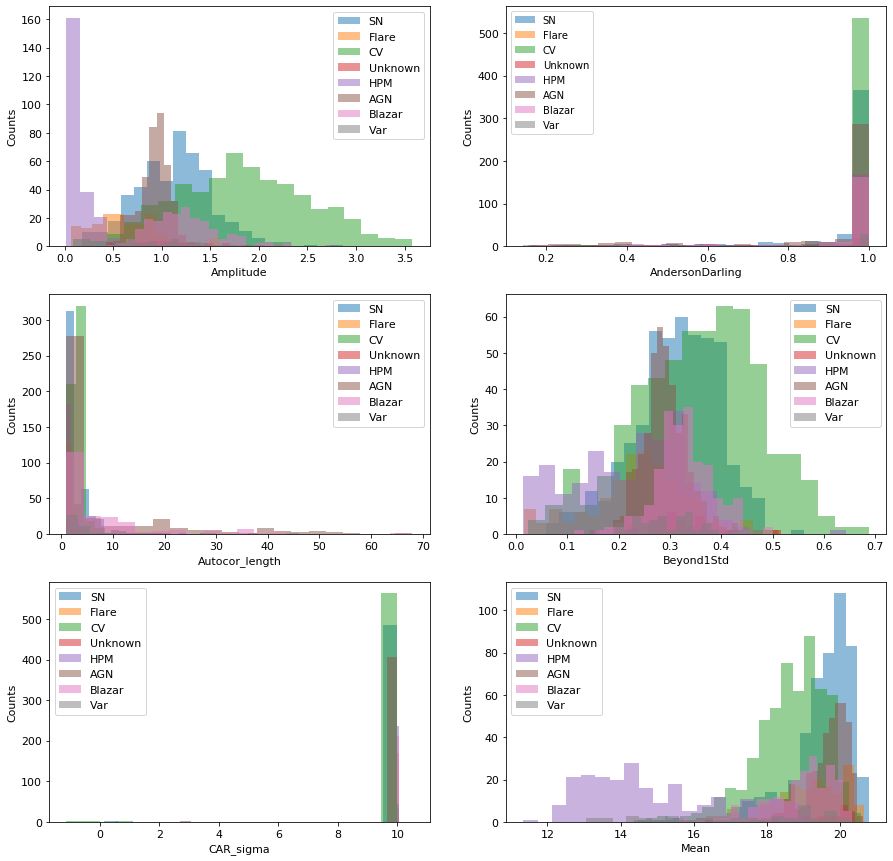

In [7]:
clss = ['SN','Flare','CV','Unknown','HPM','AGN','Blazar','Var']

params = ['Amplitude','AndersonDarling', 'Autocor_length','Beyond1Std','CAR_sigma','Con',
          'Eta_e','Freq1_harmonics_rel_phase_1','LinearTrend','MaxSlope','Mean','Period_fit', 
          'SlottedA_length', 'SmallKurtosis','StructureFunction_index_21']

n = 0


plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(15,15))
# plt.figure(figsize=(14,8))
for i in clss:

    cls = ft_data[ft_data['Class']==i]

    
    
    plt.subplot(321)
    plt.hist(cls[params[n]],label = i,alpha=0.5, bins = 20)
    plt.legend()
    plt.xlabel(params[n])
    plt.ylabel('Counts')
    
    plt.subplot(322)
    plt.hist(cls[params[n+1]],label = i,alpha=0.5, bins = 20)
    plt.legend(fontsize=10)
    plt.xlabel(params[n+1])
    plt.ylabel('Counts')
    
    plt.subplot(323)
    plt.hist(cls[params[n+2]],label = i,alpha=0.5, bins = 20)
    plt.legend()
    plt.xlabel(params[n+2])
    plt.ylabel('Counts')
    
    plt.subplot(324)
    plt.hist(cls[params[n+3]],label = i,alpha=0.5, bins = 20)
    plt.legend()
    plt.xlabel(params[n+3])
    plt.ylabel('Counts')
    
    plt.subplot(325)
    plt.hist(cls[params[n+4]],label = i,alpha=0.5, bins = 20)
    plt.legend()
    plt.xlabel(params[n+4])
    plt.ylabel('Counts')
    
    plt.subplot(326)
    plt.hist(cls[params[n+10]],label = i,alpha=0.5, bins = 20)
    plt.legend()
    plt.xlabel(params[n+10])
    plt.ylabel('Counts')
    
    
plt.savefig(results_dir + 'feature_hist.png',bbox_inches="tight")  
plt.show()

# Scatter plots of the features

/home/malema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/home/malema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/home/malema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes

/home/malema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/malema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/malema/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

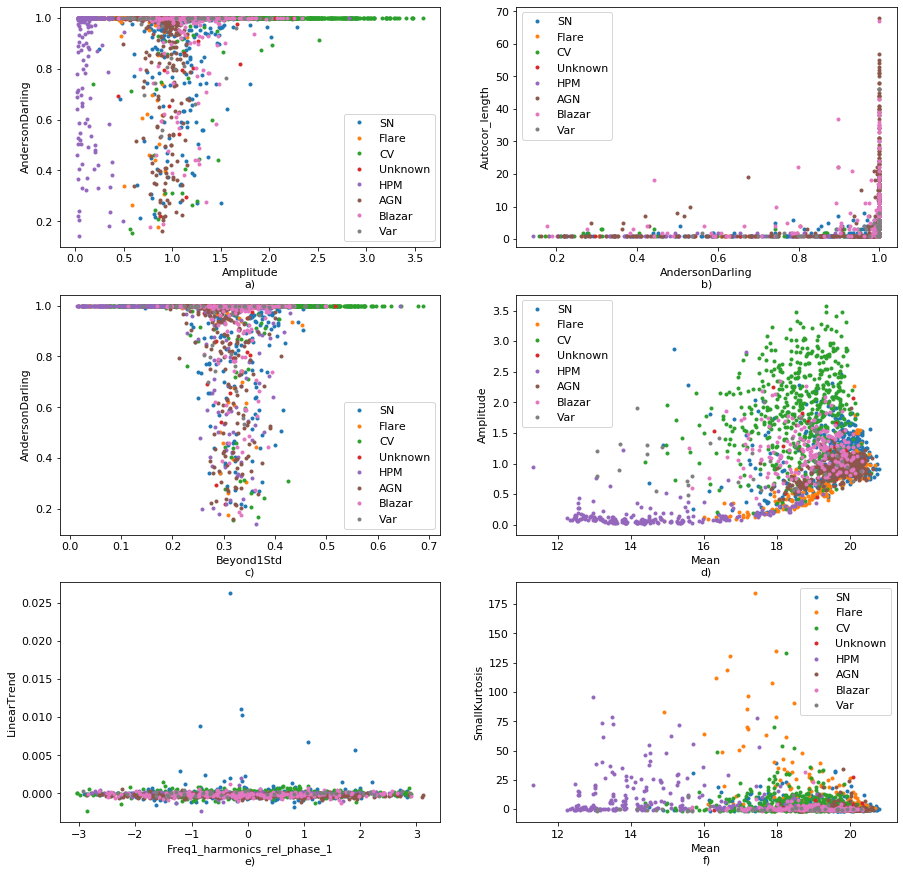

In [8]:
plt.figure(figsize=(15,15))

for i in clss:

    cls = ft_data[ft_data['Class']==i]

    
    
    plt.subplot(321)
    plt.plot(cls[params[n]],cls[params[n+1]],'.',label = i)
    plt.legend()
    plt.xlabel(params[n]  + '\n' +'a)')
    plt.ylabel(params[n+1])
    
    plt.subplot(322)
    plt.plot(cls[params[n+1]],cls[params[n+2]],'.',label = i)
    plt.legend()
    plt.xlabel(params[n+1] +'\n' +'b)')
    plt.ylabel(params[n+2])
    
    plt.subplot(323)
    plt.plot(cls[params[n+3]],cls[params[n+1]],'.',label = i)
    plt.legend()
    plt.xlabel(params[n+3]  + '\n' +'c)')
    plt.ylabel(params[n+1])
   
    plt.subplot(324)
    plt.plot(cls[params[n+10]],cls[params[n]],'.',label = i)
    plt.legend()
    plt.xlabel(params[n+10]  + '\n' +'d)')
    plt.ylabel(params[n])
    
    plt.subplot(325)
    plt.plot(cls[params[n+7]],cls[params[n+8]],'.',label = i)
#     plt.legend()
    plt.xlabel(params[n+7]  + '\n' +'e)')
    plt.ylabel(params[n+8])
    
    plt.subplot(326)
    plt.plot(cls[params[n+10]],cls[params[n+13]],'.',label =i)
    plt.legend()
    plt.xlabel(params[n+10]  + '\n' +'f)')
    plt.ylabel(params[n+13])
    
plt.savefig(results_dir +'feature_Scat.png',bbox_inches="tight")
plt.show()